# Individual Proyect #2: Data Analysis

## Table of Contents

* Libraries and Dataset Import
* Initial EDA
* ETL
* KPI #2
* ETL continuation
* EDA continuation

---

### Libraries

In [79]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import nltk
from nltk.corpus import wordnet
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\German\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Importing Datasets

In [80]:
df_accidentesaviones = pd.read_csv("AccidentesAviones.csv")

---

### Exploratory Data Analysis (EDA)

Main Objective: Evaluate factors of the fatalities in flights accidents over the years

- Key Performance Indicator (KPI) #1: The 10% reduction in crew fatality rate over the past 10 years, when compared to the preceding decade, should be assessed.
- Key Performance Indicator (KPI) #2: To be decided.

In [81]:
print(df_accidentesaviones.info())
df_accidentesaviones.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [82]:
df_accidentesaviones.describe()

,Unnamed: 0
count,5008.000000
mean,2503.500000
std,1445.829404
min,0.000000
25%,1251.750000
50%,2503.500000
75%,3755.250000
max,5007.000000


In [83]:
null_counts = df_accidentesaviones.isnull().sum()

print(null_counts)

Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64


Observations:
- The 'df_accidentesaviones' DataFrame needs treatment in it's raw form to be able to analyze it. 
- Too much NaN values.
- NaN values are written '?', needs treatment.
- The object datatype impede .describe to get the information on the numeric variables.
- The column names are in different languages and needs to uniform in upper and lower case.
- The dates column values needs a specific redaction to be able to transform to a datetime type.
- Some columns seems to be irrelevant to the current analysis. Needs confirmation.

Possible lines of research for KPI #2: 
- Fatalities related to aircraft type.
- Fatalities related to military/civilian type of flights.

---

### Extract Transform Load (ETL)

In [84]:
df_w_nulls = pd.DataFrame(df_accidentesaviones)
df_w_nulls.replace('?', pd.NA, inplace=True)

# Count null values in each column
null_counts = df_w_nulls.isnull().sum()

print(null_counts)

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64


In [85]:
def convert_to_year(date_string):
    date_object = datetime.strptime(date_string, "%B %d, %Y")
    return date_object.year

# Apply the function to the 'fecha' column
df_w_nulls['year'] = df_w_nulls['fecha'].apply(lambda x: convert_to_year(x))

Unnecessary columns dropping for the KPI #1 and possible KPIs #2:

In [86]:
columns_to_drop = ['Unnamed: 0', 'HORA declarada', 'flight_no', 'route', 'registration', 'ground', 'cn_ln', 'summary']

# Drop the selected columns
df_w_nulls = df_w_nulls.drop(columns=columns_to_drop)

Create 'Month' column to verify if it's useful:

In [87]:
def extract_month_name(date):
    import re
    month_match = re.search(r'([A-Za-z]+)', date)
    if month_match:
        return month_match.group(1)
    return None

# Apply the function to create a new column 'month_name'
df_w_nulls['month'] = df_w_nulls['fecha'].apply(extract_month_name)

Create 'Season' column to verify if it's useful:

In [88]:
def get_season(month):
    month_to_num = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    month_num = month_to_num.get(month, None)
    if month_num is not None:
        if month_num in [3, 4, 5]:
            return 'Spring'
        elif month_num in [6, 7, 8]:
            return 'Summer'
        elif month_num in [9, 10, 11]:
            return 'Autumn'
        else:
            return 'Winter'
    else:
        return None

# Apply the function to create a new column 'season'
df_w_nulls['season'] = df_w_nulls['month'].apply(get_season)

In [89]:
df_w_nulls = df_w_nulls.rename(columns={'fecha': 'Date', 'Ruta': 'Route', 'OperadOR': 'Operator', 'ac_type': 'Aircraft Type', 'all_aboard': 'Total Aboard', 'cantidad de fallecidos': 'Total Fatalities', 'summary': 'Summary', 'year': 'Year', 'season': 'Season', 'month': 'Month', 'all_aboard': 'All Aboard', 'fecha': 'Date', 'PASAJEROS A BORDO': 'Passengers Aboard', 'crew_aboard': 'Crew Aboard', 'passenger_fatalities': 'Passenger Fatalities', 'crew_fatalities': 'Crew Fatalities'})

Convert to null and check NaN with fewer columns:

In [90]:
df_w_nulls = pd.DataFrame(df_w_nulls)
df_w_nulls.replace('?', pd.NA, inplace=True)

# Count null values in each column
null_counts = df_w_nulls.isnull().sum()

print(null_counts)

Date                      0
Route                     5
Operator                 10
Aircraft Type            13
All Aboard               17
Passengers Aboard       221
Crew Aboard             219
Total Fatalities          8
Passenger Fatalities    235
Crew Fatalities         235
Year                      0
Month                     0
Season                    0
dtype: int64


In [91]:
df_wo_nulls = df_w_nulls.dropna(subset=['Route', 'Operator', 'Aircraft Type', 'All Aboard', 'Passengers Aboard', 'Crew Aboard', 'Total Fatalities', 'Passenger Fatalities', 'Crew Fatalities'])

In [92]:
df_wo_nulls.shape

(4751, 13)

The amount of rows is enough to continue with the analysis, even without the NaN values

In [93]:
# df_wo_nulls.to_csv("AircraftAccidents.csv")

---

### First analysis attempt for KPI #2: accidents related in 'Aircraft Type'

In [94]:
df_aa = df_wo_nulls

In [95]:
unique_values = df_aa['Aircraft Type'].nunique()
print(unique_values)

2365


In [96]:
unique_values = df_aa['Operator'].nunique()

print(f'Number of unique values in Column1: {unique_values}')

Number of unique values in Column1: 2197


In [97]:
df_aa['Aircraft Type'].head(1)

0    Wright Flyer III
Name: Aircraft Type, dtype: object

In [98]:
null_counts = df_aa.isnull().sum()

print(null_counts)

Date                    0
Route                   0
Operator                0
Aircraft Type           0
All Aboard              0
Passengers Aboard       0
Crew Aboard             0
Total Fatalities        0
Passenger Fatalities    0
Crew Fatalities         0
Year                    0
Month                   0
Season                  0
dtype: int64


Tried to use different methods to categorize on aicraft type, like: 
- Zeppelin
- Airplane
- Helicopter

In [99]:
ac_type_list = df_aa['Aircraft Type'].tolist()

In [100]:
unique_list = list(set(ac_type_list))

print(unique_list)

['Bristol 175 Britannia 312', 'Swearingen SA227-AC Metro III', 'Airbus A320-214', 'Douglas DC-2-120', 'Lockheed 1339', 'Boeing 737-4Q8', 'Savbia-Marchetti  S-73P', 'Curtiss C-46D', 'de Havilland DHC-6', 'McDonnell Douglas MD-81', 'Boeing B-707-131', 'Iluyshin Il-86', 'Hindustan Aeronautics 748-2M', 'Boeing B-747-121A', 'Convair B-36', 'Bristol 170 Freighter 31E', 'Britten-Norman BN2A-III-2 Trislander', 'Douglas DC-5', 'de Havilland Canada DHC-3 Otter', 'Mc Donnell Douglas MD-83', 'Antonov 74T-200', 'Boeing B-747-244B Combi', 'Lockheed C-130A Hercules', 'CASA 212 Aviocar 200', 'Britten-Norman BN-2A-6 Islander', 'Tupolev Tu-124', 'Britten-Norman BN-2A-8 Island', 'Douglas DC-2-115H', 'Rockwell Gulfstream Jetprop 840', 'Mitsubishi MU-2B-60', 'Antonov AN-12A', 'Ilyushin 14M', 'Antonov 2TP', 'Douglas C-49E', 'Ilyushin IL -12', 'Antonov AN-12B', 'Douglas DC-7BF', 'Boeing B-727-22QC', 'Douglas DC9-15F', 'Embraer 120RT Brasilia', 'de Havilland 89A Dragon Rapide', 'Curtiss C-46E', 'Boeing RB-52B

In [101]:
'''
converted_list = []
for aircraft_model_name in unique_list:
    wikipedia_category_name = convert_aircraft_model_name_to_wikipedia_category_name(aircraft_model_name)
    if wikipedia_category_name:
        converted_list.append(wikipedia_category_name)

print(converted_list)
'''

'\nconverted_list = []\nfor aircraft_model_name in unique_list:\n    wikipedia_category_name = convert_aircraft_model_name_to_wikipedia_category_name(aircraft_model_name)\n    if wikipedia_category_name:\n        converted_list.append(wikipedia_category_name)\n\nprint(converted_list)\n'

In [102]:
''' 
# Open a text file for writing
with open('ac_type.txt', 'w') as file:
    for value in df_drop_col['ac_type']:
        file.write(str(value) + '\n')
'''

" \n# Open a text file for writing\nwith open('ac_type.txt', 'w') as file:\n    for value in df_drop_col['ac_type']:\n        file.write(str(value) + '\n')\n"

In [103]:
'''
pip install wikipedia-api
import wikipediaapi
'''

'\npip install wikipedia-api\nimport wikipediaapi\n'

Tried installing libraries with aircraft models

In [104]:
'''
OpenFlight
FlightAware
''' 

'\nOpenFlight\nFlightAware\n'

Never made it work

---

### Second analysis attempt for KPI #2: accidents related in 'Flight Type', military or civilian

In [105]:
military_keywords = []

In [106]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms


military_synonyms = get_synonyms('Military')
navy_synonyms = get_synonyms('Navy')
airforce_synonyms = get_synonyms('Air Force')
royal_synonyms = get_synonyms('Royal')
army_synonyms = get_synonyms('Army')

In [107]:
military_synonyms = get_synonyms('Military')
navy_synonyms = get_synonyms('Navy')
airforce_synonyms = get_synonyms('Air Force')
royal_synonyms = get_synonyms('Royal')
army_synonyms = get_synonyms('Army')

print("Synonyms for 'military':", military_synonyms)
print("Synonyms for 'navy':", navy_synonyms)
print("Synonyms for 'airforce':", airforce_synonyms)
print("Synonyms for 'royal':", royal_synonyms)
print("Synonyms for 'army':", army_synonyms)

Synonyms for 'military': {'armed_services', 'military_machine', 'military', 'war_machine', 'armed_forces'}
Synonyms for 'navy': {'dark_blue', 'US_Navy', 'naval_forces', 'USN', 'United_States_Navy', 'Navy', 'navy_blue', 'navy'}
Synonyms for 'airforce': set()
Synonyms for 'royal': {'imperial', 'purple', 'royal_stag', 'majestic', 'regal', 'royal'}
Synonyms for 'army': {'U._S._Army', 'regular_army', 'ground_forces', 'United_States_Army', 'USA', 'US_Army', 'Army', 'army'}


In [108]:
def replace_underscore_with_space(input_set):
    return {value.replace('_', ' ') for value in input_set}


In [109]:
military_synonyms = replace_underscore_with_space(military_synonyms)
navy_synonyms = replace_underscore_with_space(navy_synonyms)
royal_synonyms = replace_underscore_with_space(royal_synonyms)
army_synonyms = replace_underscore_with_space(army_synonyms)
print(military_synonyms)
print(navy_synonyms)
print(royal_synonyms)
print(army_synonyms)

{'war machine', 'armed forces', 'armed services', 'military', 'military machine'}
{'US Navy', 'navy blue', 'USN', 'naval forces', 'Navy', 'dark blue', 'United States Navy', 'navy'}
{'imperial', 'royal stag', 'purple', 'majestic', 'regal', 'royal'}
{'US Army', 'regular army', 'United States Army', 'USA', 'ground forces', 'Army', 'U. S. Army', 'army'}


In [110]:
army_synonyms.remove('USA')

print(army_synonyms)

{'US Army', 'regular army', 'United States Army', 'ground forces', 'Army', 'U. S. Army', 'army'}


In [111]:
military_keywords.extend(military_synonyms)
military_keywords.extend(navy_synonyms)
military_keywords.extend(royal_synonyms)
military_keywords.extend(army_synonyms)

military_keywords.extend(['Royal', 'Army', 'Air Force', 'Military'])

# Print the list
print(military_keywords)

['war machine', 'armed forces', 'armed services', 'military', 'military machine', 'US Navy', 'navy blue', 'USN', 'naval forces', 'Navy', 'dark blue', 'United States Navy', 'navy', 'imperial', 'royal stag', 'purple', 'majestic', 'regal', 'royal', 'US Army', 'regular army', 'United States Army', 'ground forces', 'Army', 'U. S. Army', 'army', 'Royal', 'Army', 'Air Force', 'Military']


In [112]:
# Use str.contains to check if any of the keywords are present in 'Operator'
df_aa['Type of flight'] = df_aa['Operator'].str.contains('|'.join(military_keywords), case=False, na=False)

# Map the boolean results to 'Military' and 'Civilian'
df_aa['Type of flight'] = df_aa['Type of flight'].map({True: 'Military', False: 'Civilian'})

# If you want to handle missing values (NaN) separately, you can do this:
# df['Type of flight'] = df['Type of flight'].fillna('Unknown')

# Display the DataFrame
print(df_aa)

                    Date                               Route  \
0     September 17, 1908                 Fort Myer, Virginia   
2          July 12, 1912           Atlantic City, New Jersey   
3        August 06, 1913  Victoria, British Columbia, Canada   
6         March 05, 1915                     Tienen, Belgium   
10      October 01, 1916                Potters Bar, England   
...                  ...                                 ...   
5002      March 02, 2021                        Pieri, Sudan   
5003      March 28, 2021                  Near Butte, Alaska   
5004        May 21, 2021                Near Kaduna, Nigeria   
5005       June 10, 2021          Near Pyin Oo Lwin, Myanmar   
5007       July 06, 2021                      Palana, Russia   

                           Operator                  Aircraft Type All Aboard  \
0              Military - U.S. Army               Wright Flyer III          2   
2              Military - U.S. Navy                      Dirigible   

C:\Users\German\AppData\Local\Temp\ipykernel_23128\3604781699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa['Type of flight'] = df_aa['Operator'].str.contains('|'.join(military_keywords), case=False, na=False)
C:\Users\German\AppData\Local\Temp\ipykernel_23128\3604781699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa['Type of flight'] = df_aa['Type of flight'].map({True: 'Military', False: 'Civilian'})


Save last version of DataFrame

In [113]:
# df_aa.to_csv("AircraftAccidentsFinalF.csv")

In [114]:
# df_aa = pd.read_csv("AircraftAccidentsFinalF.csv")

The information for the second KPI is enough to perform a visual analysis in Tableau

### ETL Continuation

Create 'Country' column in case it's useful

In [115]:
def get_country_from_location(location):
    """Returns the country from a given location string.

    Args:
        location: A string representing a location.

    Returns:
        A string representing the country of the given location.
    """

    # Split the location string by commas.
    location_parts = location.split(',')

    # If the location string does not contain a comma, then the country is
    # the entire location string.
    if len(location_parts) == 1:
        country = location
    else:
        # Get the last part of the location string, which should be the country.
        country = location_parts[-1]

    # Strip any leading or trailing whitespace from the country.
    country = country.strip()

    return country


def convert_locations_to_countries(df):
    """Converts the locations in a DataFrame to countries.

    Args:
        df: A DataFrame containing a column of locations.

    Returns:
        A DataFrame with a new column containing the countries of the locations.
    """

    # Create a new column for the countries.
    df_aa['Country'] = df_aa['Route'].apply(get_country_from_location)

    # If the country is a state of the USA, replace it with the USA.
    df_aa['Country'] = df_aa['Country'].replace(
        ['Virginia', 'New Jersey'], 'USA')

    return df



In [116]:
# Convert the locations to countries.
df = convert_locations_to_countries(df_aa.copy())

# Print the DataFrame.
print(df)

                    Date                               Route  \
0     September 17, 1908                 Fort Myer, Virginia   
2          July 12, 1912           Atlantic City, New Jersey   
3        August 06, 1913  Victoria, British Columbia, Canada   
6         March 05, 1915                     Tienen, Belgium   
10      October 01, 1916                Potters Bar, England   
...                  ...                                 ...   
5002      March 02, 2021                        Pieri, Sudan   
5003      March 28, 2021                  Near Butte, Alaska   
5004        May 21, 2021                Near Kaduna, Nigeria   
5005       June 10, 2021          Near Pyin Oo Lwin, Myanmar   
5007       July 06, 2021                      Palana, Russia   

                           Operator                  Aircraft Type All Aboard  \
0              Military - U.S. Army               Wright Flyer III          2   
2              Military - U.S. Navy                      Dirigible   

C:\Users\German\AppData\Local\Temp\ipykernel_23128\909461051.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa['Country'] = df_aa['Route'].apply(get_country_from_location)
C:\Users\German\AppData\Local\Temp\ipykernel_23128\909461051.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa['Country'] = df_aa['Country'].replace(


In [117]:
column_values = df_aa['Route'].tolist()

# Save the list to a text file
with open('column_values.txt', 'w') as f:
    for value in column_values:
        f.write(str(value) + '\n')

Function to confirm there are no duplicated rows in the DataFrame

In [118]:
import pandas as pd

def hay_duplicados_exactos(df_aa):


  for i in range(len(df_aa)):
    for j in range(i + 1, len(df_aa)):
      if df.iloc[i].equals(df.iloc[j]):
        return True

  return False

In [119]:
#print(hay_duplicados_exactos(df_aa))

The result was False, so there are no duplicated rows

---

### EDA Continuation

Outliers verification

Are there any bigger amount of fatalities than passengers aboard?

In [120]:
def muertes_mayores_que_abordos(df):

  filas_con_muertes_mayores = []
  for index in df.index:
    if df.loc[index, "Total Fatalities"] > df.loc[index, "All Aboard"]:
      filas_con_muertes_mayores.append(df.iloc[index])
  return pd.DataFrame(filas_con_muertes_mayores) if filas_con_muertes_mayores else False

In [122]:
#muertes_mayores_que_abordos(df_aa)

Quick research about max amount of possible passengers in flights

In [123]:
def values_above_800_passengers(df):
  """
  Devuelve los valores de la columna "Total Aboard" que sean mayores de 800.

  Args:
    df: El dataframe con los datos.

  Returns:
    Una lista con los valores de la columna "Total Aboard" que sean mayores de 800.
    False si no hay valores mayores que 800.
  """

  values_above_800 = []
  for value in df["All Aboard"]:
    if value > 800:
      values_above_800.append(value)
  return values_above_800 if values_above_800 else False



In [124]:
values_above_800_passengers(df_aa)

TypeError: '>' not supported between instances of 'str' and 'int'

No flights with more fatalities than passengers, so there are no realted outliers

The average of passengers in flights to check if there are higher values

In [125]:
column_types = df_aa.dtypes

print(column_types)

Date                    object
Route                   object
Operator                object
Aircraft Type           object
All Aboard              object
Passengers Aboard       object
Crew Aboard             object
Total Fatalities        object
Passenger Fatalities    object
Crew Fatalities         object
Year                     int64
Month                   object
Season                  object
Type of flight          object
Country                 object
dtype: object


In [126]:
def convert_to_int(col):
    return col.astype(int)

df_aa[['All Aboard', 'Passengers Aboard', 'Crew Aboard', 'Total Fatalities', 'Passenger Fatalities', 'Crew Fatalities']] = df_aa[['All Aboard', 'Passengers Aboard', 'Crew Aboard', 'Total Fatalities', 'Passenger Fatalities', 'Crew Fatalities']].apply(convert_to_int)

# Print the dataframe
print(df_aa)

                    Date                               Route  \
0     September 17, 1908                 Fort Myer, Virginia   
2          July 12, 1912           Atlantic City, New Jersey   
3        August 06, 1913  Victoria, British Columbia, Canada   
6         March 05, 1915                     Tienen, Belgium   
10      October 01, 1916                Potters Bar, England   
...                  ...                                 ...   
5002      March 02, 2021                        Pieri, Sudan   
5003      March 28, 2021                  Near Butte, Alaska   
5004        May 21, 2021                Near Kaduna, Nigeria   
5005       June 10, 2021          Near Pyin Oo Lwin, Myanmar   
5007       July 06, 2021                      Palana, Russia   

                           Operator                  Aircraft Type  \
0              Military - U.S. Army               Wright Flyer III   
2              Military - U.S. Navy                      Dirigible   
3                    

C:\Users\German\AppData\Local\Temp\ipykernel_23128\1873806023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aa[['All Aboard', 'Passengers Aboard', 'Crew Aboard', 'Total Fatalities', 'Passenger Fatalities', 'Crew Fatalities']] = df_aa[['All Aboard', 'Passengers Aboard', 'Crew Aboard', 'Total Fatalities', 'Passenger Fatalities', 'Crew Fatalities']].apply(convert_to_int)


In [127]:
def values_above_200_passengers(df):

  values_over_200 = []
  for value in df["All Aboard"]:
    if value > 200:
      values_over_200.append(value)
  return values_over_200 if values_over_200 else False

In [128]:
len(values_above_200_passengers(df_aa))

64

In [129]:
def values_above_200_deaths(df):


  values_over_200 = []
  for value in df["Total Fatalities"]:
    if value > 200:
      values_over_200.append(value)
  return values_over_200 if values_over_200 else False

In [130]:
len(values_above_200_deaths(df_aa))

29

In [131]:
values_above_200_deaths(df_aa)

[346,
 583,
 213,
 271,
 257,
 301,
 269,
 329,
 520,
 256,
 290,
 259,
 223,
 261,
 264,
 230,
 349,
 228,
 234,
 229,
 217,
 260,
 225,
 275,
 228,
 239,
 298,
 224,
 257]

Quick research about the biggest aircraft accidents in History and matches with the one registered here, 583, so the checked and confirmed:

In [132]:
row_583_fatalities = df_aa.loc[df_aa["Total Fatalities"] == 583]
row_583_fatalities

,Date,Route,Operator,Aircraft Type,All Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passenger Fatalities,Crew Fatalities,Year,Month,Season,Type of flight,Country
2902,"March 27, 1977","Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644,614,30,583,560,23,1977,March,Spring,Civilian,Canary Islands


This is de historic accident itself, so it's the final confirmation that there is no outliers regarding the 'Total Fatalities' column.

No outliers in 'Years' column:

In [133]:
df_aa['Year'].min()

1908

In [134]:
df_aa['Year'].max()

2021

Outliers for 'Passengers Aboard', 'Crew Aboard', 'Passenger Fatalities', 'Crew Fatalities'

In [135]:
def values_above_200_passengers(df):


  values_above_200_passengers = []
  for value in df["Passengers Aboard"]:
    if value > 200:
      values_above_200_passengers.append(value)
  return values_above_200_passengers if values_above_200_passengers else False

In [136]:
len(values_above_200_passengers(df_aa))

59

In [137]:
def values_above_200_crew(df):


  values_above_200_crew = []
  for value in df["Crew Aboard"]:
    if value > 200:
      values_above_200_crew.append(value)
  return values_above_200_crew if values_above_200_crew else False

In [138]:
values_above_200_crew(df_aa)

False

In [139]:
def values_above_200_pf(df):

  # Convert the "Passenger Fatalities" column to numeric values.
  df["Passenger Fatalities"] = pd.to_numeric(df["Passenger Fatalities"], errors='coerce')

  # Create a list of values above 200.
  values_above_200_pf = []
  for value in df["Passenger Fatalities"]:
    if value > 200:
      values_above_200_pf.append(value)

  # Return the list of values above 200, or False if there are none.
  return values_above_200_pf if values_above_200_pf else False



In [140]:
len(values_above_200_pf(df_aa))

C:\Users\German\AppData\Local\Temp\ipykernel_23128\2121853779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Passenger Fatalities"] = pd.to_numeric(df["Passenger Fatalities"], errors='coerce')


29

In [141]:
def values_above_200_cf(df):


  values_above_200_cf = []
  for value in df["Crew Fatalities"]:
    if value > 200:
      values_above_200_cf.append(value)
  return values_above_200_cf if values_above_200_cf else False


In [142]:
values_above_200_cf(df_aa)

False

In [143]:
def muertes_mayores_que_abordos_crew(df):


  filas_con_muertes_mayores = df[df["Crew Fatalities"] > df["Crew Aboard"]]

  if not filas_con_muertes_mayores.empty:
    return filas_con_muertes_mayores
  else:
    return False

In [144]:
muertes_mayores_que_abordos_crew(df_aa)

,Date,Route,Operator,Aircraft Type,All Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passenger Fatalities,Crew Fatalities,Year,Month,Season,Type of flight,Country
1672,"December 31, 1957","Buenos Aires, Argentina",Aerolineas Argentinas,Short Sunderland,50,44,6,9,1,8,1957,December,Winter,Civilian,Argentina
4914,"September 05, 2015","Off Dakar, Near Dioubel, Senegal",Senegalair,Hawker Siddeley HS-125,7,5,2,7,2,5,2015,September,Autumn,Civilian,Senegal


In [145]:
def muertes_mayores_que_abordos_pasajeros(df):


  filas_con_muertes_mayores = df[df["Passenger Fatalities"] > df["Passengers Aboard"]]

  if not filas_con_muertes_mayores.empty:
    return filas_con_muertes_mayores
  else:
    return False

In [146]:
muertes_mayores_que_abordos_pasajeros(df_aa)

,Date,Route,Operator,Aircraft Type,All Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passenger Fatalities,Crew Fatalities,Year,Month,Season,Type of flight,Country
2781,"December 29, 1974","Tikal, Guatemala",Edwin Ortiz,Lockheed 18 LodeStar,24,21,3,24,213,3,1974,December,Winter,Civilian,Guatemala
3227,"April 30, 1983","Jacksonville, Florida",Military - United States Navy,Convair CV-340,15,9,6,15,98,6,1983,April,Spring,Military,Florida
3230,"May 06, 1983","Klyuchi, Russia",Military - Soviet Air Force,Antonov An-26,37,31,6,33,37,6,1983,May,Spring,Military,Russia


In [147]:
df_aa = df_aa.drop([1672, 4914, 2781, 3227, 3230], axis=0)

In [148]:
df_aa.shape

(4746, 15)

In [149]:
df_aa.describe()

,All Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passenger Fatalities,Crew Fatalities,Year
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,31.443742,26.934471,4.519385,22.536030,18.959966,3.587231,1971.272651
std,46.200278,44.165912,3.761339,35.733731,34.004922,3.171939,24.496296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,6.000000,3.000000,2.000000,4.000000,1.000000,2.000000,1951.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,1970.500000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,1992.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2021.000000


In [150]:
df_aa.head(3)

,Date,Route,Operator,Aircraft Type,All Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passenger Fatalities,Crew Fatalities,Year,Month,Season,Type of flight,Country
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,1,1,1,0,1908,September,Autumn,Military,USA
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0,5,5,0,5,1912,July,Summer,Military,USA
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,0,1,1,0,1,1913,August,Summer,Civilian,Canada


In [151]:
# df_aa.to_csv("AircraftAccidentsFinalF.csv")

Visualize most of the graphics to preview before Tableau

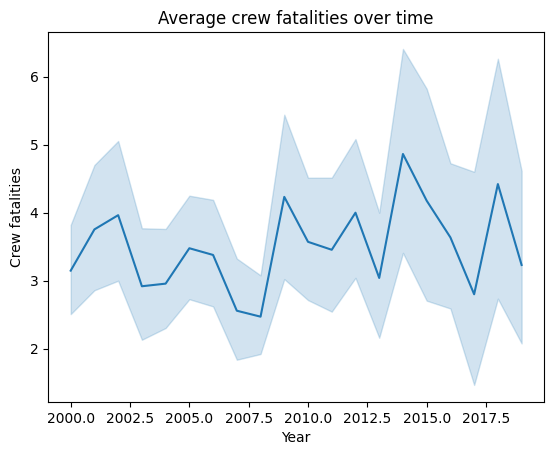

In [161]:
df_aa_filtered = df_aa[(df_aa['Year'] >= 2000) & (df_aa['Year'] <= 2019)]

warnings.filterwarnings('ignore', category=FutureWarning)

sns.lineplot(
    x = "Year",
    y = "Crew Fatalities",
    data=df_aa_filtered
)

plt.title('Average crew fatalities over time')
plt.xlabel('Year')
plt.ylabel('Crew fatalities')

plt.show()

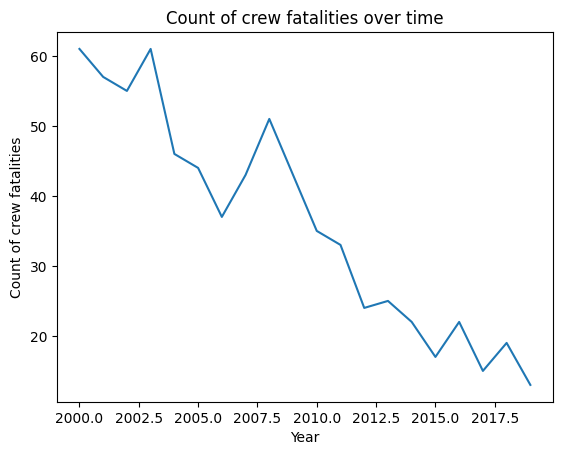

In [166]:
df_aa_filtered = df_aa[(df_aa['Year'] >= 2000) & (df_aa['Year'] <= 2019)]

df_crew_fatalities_count = df_aa_filtered.groupby('Year')['Crew Fatalities'].count()

sns.lineplot(
    x = df_crew_fatalities_count.index,
    y = df_crew_fatalities_count.values,
    data=df_crew_fatalities_count
)

plt.title('Count of crew fatalities over time')
plt.xlabel('Year')
plt.ylabel('Count of crew fatalities')

plt.show()

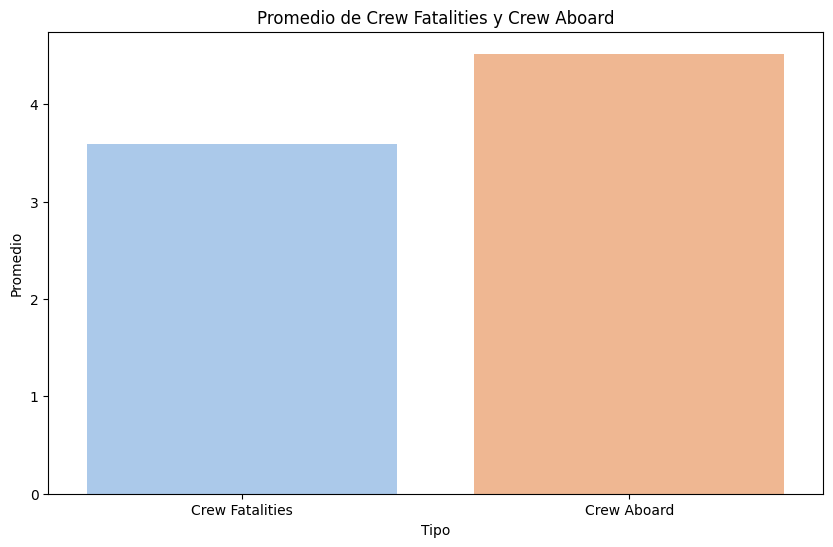

In [182]:
promedio_fatalities = df_aa['Crew Fatalities'].mean()
promedio_aboard = df_aa['Crew Aboard'].mean()

# Crea un DataFrame para los promedios
df_promedios = pd.DataFrame({'Tipo': ['Crew Fatalities', 'Crew Aboard'],
                            'Promedio': [promedio_fatalities, promedio_aboard]})

# Crea el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo', y='Promedio', data=df_promedios, palette='pastel')
plt.title('Promedio de Crew Fatalities y Crew Aboard')
plt.show()